In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow.keras.models as models
from tensorflow.keras.layers import Dense
from sklearn .datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
diabetes = load_diabetes()
data = diabetes.data
targets = diabetes.target
df = pd.DataFrame(data, columns=diabetes.feature_names)
df['target'] = targets
print(df.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.0

In [7]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2, random_state=42)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
 model.compile(optimizer='adam', loss='mean_squared_error',
metrics=['mae'])
 history = model.fit(train_data, train_targets, epochs=100,
batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 2823.8357 - mae: 42.6525 - val_loss: 2837.1506 - val_mae: 42.2192
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2590.7930 - mae: 40.7606 - val_loss: 2807.5640 - val_mae: 41.8652
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2856.4082 - mae: 43.0021 - val_loss: 2799.6694 - val_mae: 41.7939
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2470.5615 - mae: 40.2209 - val_loss: 2821.8708 - val_mae: 41.9875
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2659.3687 - mae: 41.6110 - val_loss: 2809.4023 - val_mae: 41.8065
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2783.9792 - mae: 41.8317 - val_loss: 2806.4856 - val_mae: 41.8023
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2603.4072 - mae: 41.3680 - val_loss: 2803.3262 - val_mae: 41.7660
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2263.4165 - mae: 38.4864 - val_loss: 2808.6653 - val_mae: 41.8708
Epoch 9/10

In [11]:
 test_loss, test_mae = model.evaluate(test_data, test_targets)
 print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2850.0083 - mae: 42.3801 
Test Loss: 2710.9912109375, Test MAE: 41.1645393371582


In [13]:
predictions = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


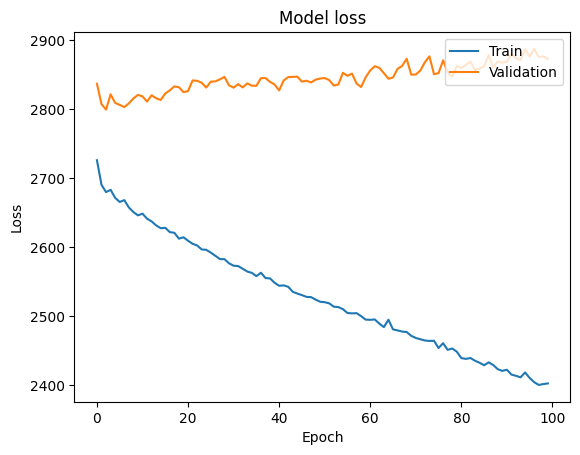

In [15]:
 plt.plot(history.history['loss'], label='Training Loss')
 plt.plot(history.history['val_loss'], label='Validation Loss')
 plt.title('Model loss')
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.legend(["Train","Validation"],  loc="upper right")
 plt.show()